In [1]:
import pandas as pd
import numpy as np
import pathlib

In [1]:
pip install tensorflow-gpu==2.10



  Using cached tensorflow_gpu-2.10.0-cp38-cp38-win_amd64.whl.metadata (3.1 kB)
Using cached tensorflow_gpu-2.10.0-cp38-cp38-win_amd64.whl (455.9 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1
Num GPUs Available:  1


In [3]:
import tensorflow as tf
print("Devices List:", tf.config.list_logical_devices())


Devices List: [LogicalDevice(name='/device:CPU:0', device_type='CPU'), LogicalDevice(name='/device:GPU:0', device_type='GPU')]


In [4]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.set_visible_devices(physical_devices[0], 'GPU')


In [5]:
import tensorflow as tf
import cv2
print(tf.__version__, cv2.__version__)


2.10.0 4.10.0


In [2]:
import os

os.getcwd()

'c:\\Users\\lalit\\Desktop\\python practice\\image_classification\\fsdsimageclassification\\notebooks'

In [3]:
os.getcwd()
data_path=os.path.join(os.getcwd(),'data')
os.listdir(data_path)

['Cat', 'Dog']

In [4]:
data_dir=pathlib.Path(data_path)
data_dir

WindowsPath('c:/Users/lalit/Desktop/python practice/image_classification/fsdsimageclassification/notebooks/data')

In [5]:
len(list(data_dir.glob('*/*.jpg')))

25000

In [6]:
list(data_dir.glob('dog/*'))

[WindowsPath('c:/Users/lalit/Desktop/python practice/image_classification/fsdsimageclassification/notebooks/data/dog/0.jpg'),
 WindowsPath('c:/Users/lalit/Desktop/python practice/image_classification/fsdsimageclassification/notebooks/data/dog/1.jpg'),
 WindowsPath('c:/Users/lalit/Desktop/python practice/image_classification/fsdsimageclassification/notebooks/data/dog/10.jpg'),
 WindowsPath('c:/Users/lalit/Desktop/python practice/image_classification/fsdsimageclassification/notebooks/data/dog/100.jpg'),
 WindowsPath('c:/Users/lalit/Desktop/python practice/image_classification/fsdsimageclassification/notebooks/data/dog/1000.jpg'),
 WindowsPath('c:/Users/lalit/Desktop/python practice/image_classification/fsdsimageclassification/notebooks/data/dog/10000.jpg'),
 WindowsPath('c:/Users/lalit/Desktop/python practice/image_classification/fsdsimageclassification/notebooks/data/dog/10001.jpg'),
 WindowsPath('c:/Users/lalit/Desktop/python practice/image_classification/fsdsimageclassification/notebo

In [7]:
list(data_dir.glob('cat/*'))

[WindowsPath('c:/Users/lalit/Desktop/python practice/image_classification/fsdsimageclassification/notebooks/data/cat/0.jpg'),
 WindowsPath('c:/Users/lalit/Desktop/python practice/image_classification/fsdsimageclassification/notebooks/data/cat/1.jpg'),
 WindowsPath('c:/Users/lalit/Desktop/python practice/image_classification/fsdsimageclassification/notebooks/data/cat/10.jpg'),
 WindowsPath('c:/Users/lalit/Desktop/python practice/image_classification/fsdsimageclassification/notebooks/data/cat/100.jpg'),
 WindowsPath('c:/Users/lalit/Desktop/python practice/image_classification/fsdsimageclassification/notebooks/data/cat/1000.jpg'),
 WindowsPath('c:/Users/lalit/Desktop/python practice/image_classification/fsdsimageclassification/notebooks/data/cat/10000.jpg'),
 WindowsPath('c:/Users/lalit/Desktop/python practice/image_classification/fsdsimageclassification/notebooks/data/cat/10001.jpg'),
 WindowsPath('c:/Users/lalit/Desktop/python practice/image_classification/fsdsimageclassification/notebo

In [8]:
import cv2
import matplotlib.pyplot as plt

In [9]:
dog_cat_dict={'dog':list(data_dir.glob('dog/*'))[0:3000],
              'cat':list(data_dir.glob('cat/*'))[0:3000]}

dog_cat_label_dict={'dog':1,
                    'cat':0}

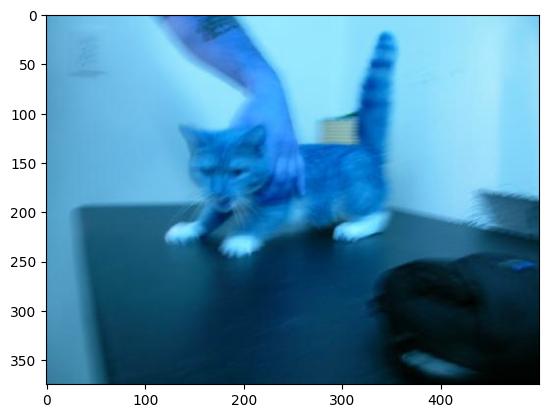

In [10]:
plt.imshow(cv2.imread(dog_cat_dict['cat'][0]))

In [70]:
import cv2

x, y = [], []

for pat_name, images in dog_cat_dict.items():
    for image in images:
        # Read the image
        img = cv2.imread(str(image))
        
        # Check if the image is read successfully
        if img is None:
            print(f"Warning: Failed to load image: {image}")
            continue
        
        # Resize the image
        resize_image = cv2.resize(img, (180, 180))
        
        # Append to the list
        x.append(resize_image)
        y.append(dog_cat_label_dict[pat_name])


In [71]:
print(type(x))
print(type(y))


<class 'list'>
<class 'list'>


In [72]:
x


[array([[[126, 115, 117],
         [130, 116, 118],
         [120, 103, 106],
         ...,
         [147, 135, 133],
         [147, 136, 134],
         [142, 132, 132]],
 
        [[128, 117, 119],
         [132, 118, 120],
         [122, 105, 108],
         ...,
         [150, 138, 136],
         [148, 137, 136],
         [146, 136, 136]],
 
        [[130, 119, 121],
         [134, 121, 123],
         [124, 107, 111],
         ...,
         [154, 142, 140],
         [150, 138, 137],
         [148, 137, 137]],
 
        ...,
 
        [[ 76,  72,  67],
         [ 85,  82,  75],
         [ 81,  78,  70],
         ...,
         [ 76,  68,  61],
         [ 73,  67,  60],
         [ 82,  79,  71]],
 
        [[ 79,  75,  70],
         [ 83,  79,  72],
         [ 86,  83,  75],
         ...,
         [ 81,  73,  66],
         [ 93,  87,  80],
         [ 86,  84,  76]],
 
        [[ 77,  73,  68],
         [ 78,  74,  67],
         [ 78,  75,  67],
         ...,
         [104,  96,  89],
  

In [73]:
print(type(x[0]))
print(type(y[0]))


<class 'numpy.ndarray'>
<class 'int'>


In [74]:
len(x)

5981

In [75]:
len(y)

5981

In [76]:
x[1].shape

(180, 180, 3)

In [77]:
x[1]

array([[[187, 198, 209],
        [115, 132, 150],
        [112, 136, 164],
        ...,
        [103, 126, 153],
        [ 91, 113, 141],
        [ 89, 111, 137]],

       [[172, 194, 217],
        [ 75, 103, 136],
        [ 83, 118, 161],
        ...,
        [ 34,  60,  93],
        [ 23,  48,  80],
        [ 24,  49,  80]],

       [[164, 188, 215],
        [ 42,  72, 108],
        [ 43,  83, 130],
        ...,
        [ 59,  87, 122],
        [ 59,  88, 122],
        [ 46,  74, 108]],

       ...,

       [[241, 254, 254],
        [229, 245, 246],
        [223, 241, 242],
        ...,
        [216, 238, 236],
        [212, 234, 232],
        [214, 236, 234]],

       [[240, 253, 254],
        [228, 244, 246],
        [221, 238, 241],
        ...,
        [219, 240, 238],
        [215, 235, 233],
        [215, 236, 234]],

       [[242, 255, 254],
        [238, 253, 252],
        [233, 250, 250],
        ...,
        [232, 248, 247],
        [231, 247, 246],
        [231, 247, 246]]

In [78]:
x=np.array(x)
y=np.array(y)

In [103]:
x.shape

(5981, 180, 180, 3)

In [79]:
print(type(x))
print(type(y))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [80]:
print(type(x))
print(type(y))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [81]:
x.shape 

(5981, 180, 180, 3)

In [82]:
y.shape

(5981,)

In [84]:
pd.Series(y).value_counts()

0    2991
1    2990
Name: count, dtype: int64

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [90]:
pd.Series(y).value_counts()

0    2991
1    2990
Name: count, dtype: int64

In [86]:
X_train.shape

(4784, 180, 180, 3)

In [87]:
X_train

array([[[[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [253, 253, 253],
         [253, 253, 253],
         [253, 253, 253]],

        [[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [253, 253, 253],
         [253, 253, 253],
         [253, 253, 253]],

        [[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [253, 253, 253],
         [253, 253, 253],
         [253, 253, 253]],

        ...,

        [[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [253, 253, 253],
         [253, 253, 253],
         [253, 253, 253]],

        [[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [253, 253, 253],
         [253, 253, 253],
         [253, 253, 253]],

        [[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [253, 253, 253],
        

In [88]:
y_train


array([0, 1, 0, ..., 0, 0, 0])

In [91]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [32]:
X_train_scaled[0]


array([[[0.34117647, 0.65882353, 0.47843137],
        [0.25490196, 0.58431373, 0.42745098],
        [0.25098039, 0.58823529, 0.45490196],
        ...,
        [0.43529412, 0.76078431, 0.64705882],
        [0.44705882, 0.79607843, 0.6745098 ],
        [0.47058824, 0.85098039, 0.71372549]],

       [[0.41568627, 0.74117647, 0.56078431],
        [0.47058824, 0.8       , 0.64313725],
        [0.34117647, 0.68235294, 0.54509804],
        ...,
        [0.30588235, 0.64313725, 0.53333333],
        [0.39607843, 0.77254902, 0.65490196],
        [0.33333333, 0.77254902, 0.63529412]],

       [[0.35686275, 0.69019608, 0.51372549],
        [0.4       , 0.7372549 , 0.58039216],
        [0.41568627, 0.76078431, 0.61568627],
        ...,
        [0.22745098, 0.57254902, 0.4627451 ],
        [0.19607843, 0.55294118, 0.45098039],
        [0.36862745, 0.74901961, 0.63529412]],

       ...,

       [[0.23921569, 0.23921569, 0.23921569],
        [0.21568627, 0.21568627, 0.21568627],
        [0.18039216, 0

In [102]:
y_train.shape

(4784,)

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf

num_classes = 2

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.5),  # Adding Dropout
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_test_scaled, y_test))


Epoch 1/2
150/150 [==============================] - 177s 1s/step - loss: 0.6685 - accuracy: 0.5893 - val_loss: 0.6219 - val_accuracy: 0.6358
Epoch 2/2
150/150 [==============================] - 172s 1s/step - loss: 0.5596 - accuracy: 0.7159 - val_loss: 0.5921 - val_accuracy: 0.6926


In [93]:
model.evaluate(X_test_scaled,y_test)

38/38 [==============================] - 14s 356ms/step - loss: 0.5921 - accuracy: 0.6926


[0.5920549631118774, 0.6925647258758545]

In [97]:
import cv2
import numpy as np

# Path to your image
cat_path = r'c:\Users\lalit\Desktop\catimage1.jfif'

# Read the image
cat_img = cv2.imread(cat_path)

# Resize the image to the required shape (180x180)
cat_img = cv2.resize(cat_img, (180, 180))

# Normalize the image (scale pixel values between 0 and 1)
cat_img = cat_img / 255.0

# Add the batch dimension (1, 180, 180, 3) to match the input shape required by the model
cat_img = np.expand_dims(cat_img, axis=0)

# Predict the class (dog = 1, cat = 0)
prediction = model.predict(cat_img)

# Output the class with the highest probability
predicted_class = np.argmax(prediction)

# Print the result
if predicted_class == 1:
    print("It's a dog!")
else:
    print("It's a cat!")


1/1 [==============================] - 0s 86ms/step
It's a cat!


In [111]:
import numpy as np
import pandas as pd

# Assuming X_train and X_test are 4D arrays: [n_samples, height, width, channels]
n_samples_train, height, width, channels = X_train[0:10].shape
n_samples_test = X_test[0:10].shape[0]

# Flatten both arrays
flattened_X_train = X_train[0:10].reshape(n_samples_train, height * width * channels)
flattened_X_test = X_test[0:10].reshape(n_samples_test, height * width * channels)

# Convert flattened arrays into lists so they can be stored in a single column
df_X_train = pd.DataFrame({
    'image_array': [arr.tolist() for arr in flattened_X_train],  # Convert each row to a list
    'label': y_train[0:10]  # Add labels as a new column
})

df_X_test = pd.DataFrame({
    'image_array': [arr.tolist() for arr in flattened_X_test],  # Convert each row to a list
    'label': y_test[0:10]  # Add labels as a new column
})

# Save the DataFrame with the flattened arrays and labels to CSV
df_X_train.to_csv('flattened_X_train_with_labels.csv', index=False)
df_X_test.to_csv('flattened_X_test_with_labels.csv', index=False)
    
print("Data with flattened arrays and labels saved successfully.")


Data with flattened arrays and labels saved successfully.


In [127]:
df_X_train

,image_array,label
0,"[253, 253, 253, 253, 253, 253, 253, 253, 253, ...",0
1,"[63, 57, 58, 50, 48, 45, 34, 36, 30, 13, 17, 1...",1
2,"[169, 183, 201, 169, 183, 201, 170, 182, 201, ...",0
3,"[112, 164, 180, 93, 146, 166, 81, 135, 160, 81...",0
4,"[213, 200, 188, 214, 199, 187, 225, 204, 193, ...",1
5,"[248, 249, 247, 243, 244, 242, 244, 242, 241, ...",1
6,"[10, 7, 2, 10, 7, 2, 10, 7, 2, 10, 7, 2, 10, 7...",1
7,"[19, 77, 95, 30, 71, 102, 20, 74, 99, 32, 62, ...",0
8,"[13, 10, 12, 14, 11, 13, 17, 14, 16, 21, 17, 2...",1
9,"[199, 216, 219, 198, 215, 218, 197, 214, 217, ...",0


In [3]:
import pandas as pd

In [4]:
df_X_train = pd.read_csv(r'C:\Users\lalit\Desktop\python practice\image_classification\fsdsimageclassification\artifacts\train.csv')
df_X_train

,image_array,label
0,"[0.7254901960784313, 0.7098039215686275, 0.690...",1
1,"[0.17254901960784313, 0.3215686274509804, 0.50...",1
2,"[0.4627450980392157, 0.592156862745098, 0.3686...",0
3,"[0.3568627450980392, 0.4235294117647059, 0.458...",1
4,"[0.1843137254901961, 0.25098039215686274, 0.30...",0
...,...,...
2387,"[0.9686274509803922, 0.9686274509803922, 0.968...",0
2388,"[0.6980392156862745, 0.7215686274509804, 0.713...",1
2389,"[0.3058823529411765, 0.3568627450980392, 0.341...",1
2390,"[0.23921568627450981, 0.32941176470588235, 0.4...",1


In [5]:
df_X_train.shape

(2392, 2)

In [ ]:
import numpy as np
import pandas as pd
import ast  # To convert string representations of lists back into lists
import matplotlib.pyplot as plt

# Load the CSV with flattened image arrays and labels
df_X_train = pd.read_csv(r'C:\Users\lalit\Desktop\python practice\image_classification\fsdsimageclassification\artifacts\train.csv')

# Convert the 'image_array' back from string to list and reshape it to the original image shape
image_height, image_width, num_channels = 180, 180, 3

# Function to convert the image data back to NumPy array and reshape
def convert_back_to_image(image_array_str):
    # Convert the string representation of the list back to an actual list
    image_array = ast.literal_eval(image_array_str)
    # Convert the list to a NumPy array and reshape it to the original shape
    return np.array(image_array).reshape(image_height, image_width, num_channels)

# Apply the conversion to the 'image_array' column
df_X_train['image_array'] = df_X_train['image_array'].apply(convert_back_to_image)

# Get back the images and labels
X_train_restored = np.stack(df_X_train['image_array'].values)  # Stack the arrays back into a 4D array
y_train_restored = df_X_train['label'].values  # Get the labels

# Visualize one of the images
plt.imshow(X_train_restored[0])  # Display the first image in the dataset
plt.title(f"Label: {y_train_restored[0]}")
plt.axis('off')  # Hide the axis for better viewing
plt.show()


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000002405C8C0F10>>
Traceback (most recent call last):
  File "c:\Users\lalit\Desktop\python practice\image_classification\cnnenv\lib\site-packages\ipykernel\ipkernel.py", line 790, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
KeyboardInterrupt: 


In [ ]:
X_train_restored.shape


(10, 180, 180, 3)

In [20]:
plt.imshow(X_train_restored[1205])  # Display the first image in the dataset
plt.title(f"Label: {y_train_restored[1205]}")
plt.axis('off')  # Hide the axis for better viewing
plt.show()

IndexError: index 1205 is out of bounds for axis 0 with size 10

In [28]:
# for i in   train['image']:
#   print(type(np.array((i))))

import ast

import numpy as np

# Assuming each string in train['image'] contains space-separated pixel values
train_upd = np.array([np.fromstring(image, sep=' ') for image in train['image']])

print(train_upd)



C:\Users\lalit\AppData\Local\Temp\ipykernel_8384\3871578500.py:9: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  train_upd = np.array([np.fromstring(image, sep=' ') for image in train['image']])


[]


In [29]:
train_upd

array([], shape=(19956, 0), dtype=float64)